# Data Pre-Processing
## Contents
1. Imports
2. Clean The Data
3. Constructor Colours
4. Pre-Process The Data
        4.1 Constructor Database
        4.2 Driver Database
5. References

## 1. Imports
- Install and Import the packages required to pre-process the data.
- Import the raw databases as downloaded from Kaggle (see references in section 5).

In [1]:
# Packages to Install
# install.packages("tidyverse")
# install.packages('MASS')

library(tidyverse)
library(readxl) 
library(MASS)

# Import the data
df_results <- read.csv('kaggle/results.csv')
df_drivers <- read.csv('kaggle/drivers.csv')
df_races <- read.csv('kaggle/races.csv')
df_constructors <- read.csv('kaggle/constructors.csv')

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




## 2. Clean The Data
- Clean each database by deleting the unused features/renaming features/formatting features into the correct data type.
- Merging the data into a single database with the relevant data.
- Remove 'NA' values from the database.
- Update the points for each result to reflect the current system in place (see references in section 5).
- Clean Constructor Names as per historical constructor lists (see references in section 5).

In [2]:
# Results Dataframe
df_results <- df_results %>%
mutate( # Save final positions as numeric and assign drivers that did not finish the race the value 'NA'
    finalPosition = ifelse(is.na(as.numeric(positionText)), NA, as.integer(positionText)),
    gridPosition = grid
) %>%
dplyr::select( # Select desired features
    raceId, driverId, constructorId, finalPosition, gridPosition
)

# Drivers Dataframe
df_drivers <- df_drivers %>% 
mutate( # Make neccessary mutations
    driverName = paste(forename, surname), 
    driverNationality = nationality 
) %>%
dplyr::select( # Select desired features
    driverId, driverName, driverNationality 
)

# Races Dataframe
df_races <- df_races %>% 
mutate( # convert dates to type Date
    raceDate = as.Date(date), 
    year = year
) %>%
dplyr::select( # Select desired features
    raceId, raceDate, year
) 

# Constructors Dataframe
df_constructors <- df_constructors %>%
rename( # Rename features to specify constructor
    constName = name,
    constNationality = nationality
) %>%
dplyr::select( # Select desired features
    constructorId, constName, constNationality 
)

# Merge into a single Dataframe
df_F1 <- merge(df_results, df_drivers, by = 'driverId')
df_F1 <- merge(df_F1, df_races, by = 'raceId')
df_F1 <- merge(df_F1, df_constructors, by = 'constructorId')

# Remove irrelevant features (driverId, raceId, constructorId)
df_F1 <- df_F1 %>%
dplyr::select(
    finalPosition:constNationality # Select desired features
) %>% 
drop_na() %>% # Remove NA rows
mutate( # Adjust points for each results to the current point scoring system
    standPoints = case_when(
        finalPosition == 1 ~ 25,
        finalPosition == 2 ~ 18,
        finalPosition == 3 ~ 15,
        finalPosition == 4 ~ 12,
        finalPosition == 5 ~ 10,
        finalPosition == 6 ~ 8,
        finalPosition == 7 ~ 6,
        finalPosition == 8 ~ 4,
        finalPosition == 9 ~ 2,
        finalPosition == 10 ~ 1,
        finalPosition > 10 ~ 0,
    ),
    constName = recode( # Adjust constructor names through manual audit
        constName,
        'Alpine F1 Team' = 'Alpine',
        'Brabham-Alfa Romeo' = 'Brabham',
        'Brabham-BRM' = 'Brabham',
        'Brabham-Climax' = 'Brabham',
        'Brabham-Ford' = 'Brabham',
        'Brabham-Repco' = 'Brabham',
        'Cooper-Borgward' = 'Cooper',
        'Cooper-BRM' = 'Cooper',
        'Cooper-Castellotti' = 'Cooper',
        'Cooper-Climax' = 'Cooper',
        'Cooper-Ferrari' = 'Cooper',
        'Cooper-Maserati' = 'Cooper',
        'Eagle-Climax' = 'Eagle',
        'Eagle-Weslake' = 'Eagle',
        'Haas F1 Team' = 'Haas',
        'LDS-Alfa Romeo'='LDS',
        'Lotus-BRM' = 'Lotus',
        'Lotus-Climax' = 'Lotus',
        'Lotus-Ford' = 'Lotus',
        'Lotus-Pratt &amp; Whitney' = 'Lotus',
        'Lotus F1' = 'Lotus',
        'Manor Marussia' = 'Manor',
        'March-Alfa Romeo' = 'March',
        'March-Ford' = 'March',
        'Matra-Ford' = 'Matra',
        'McLaren-Alfa Romeo' = 'McLaren',
        'McLaren-BRM' = 'McLaren',
        'McLaren-Ford' = 'McLaren',
        'McLaren-Serenissima' = 'McLaren',
        'MF1' = 'Midland',
        'Shadow-Ford' = 'Shadow',
        'Spyker MF1' = 'Spyker'
    )
)

Warning message in ifelse(is.na(as.numeric(positionText)), NA, as.integer(positionText)):
"NAs introduced by coercion"
Warning message in ifelse(is.na(as.numeric(positionText)), NA, as.integer(positionText)):
"NAs introduced by coercion"


## 3. Constructor Colours
Associatte a colour with each unique constructor.

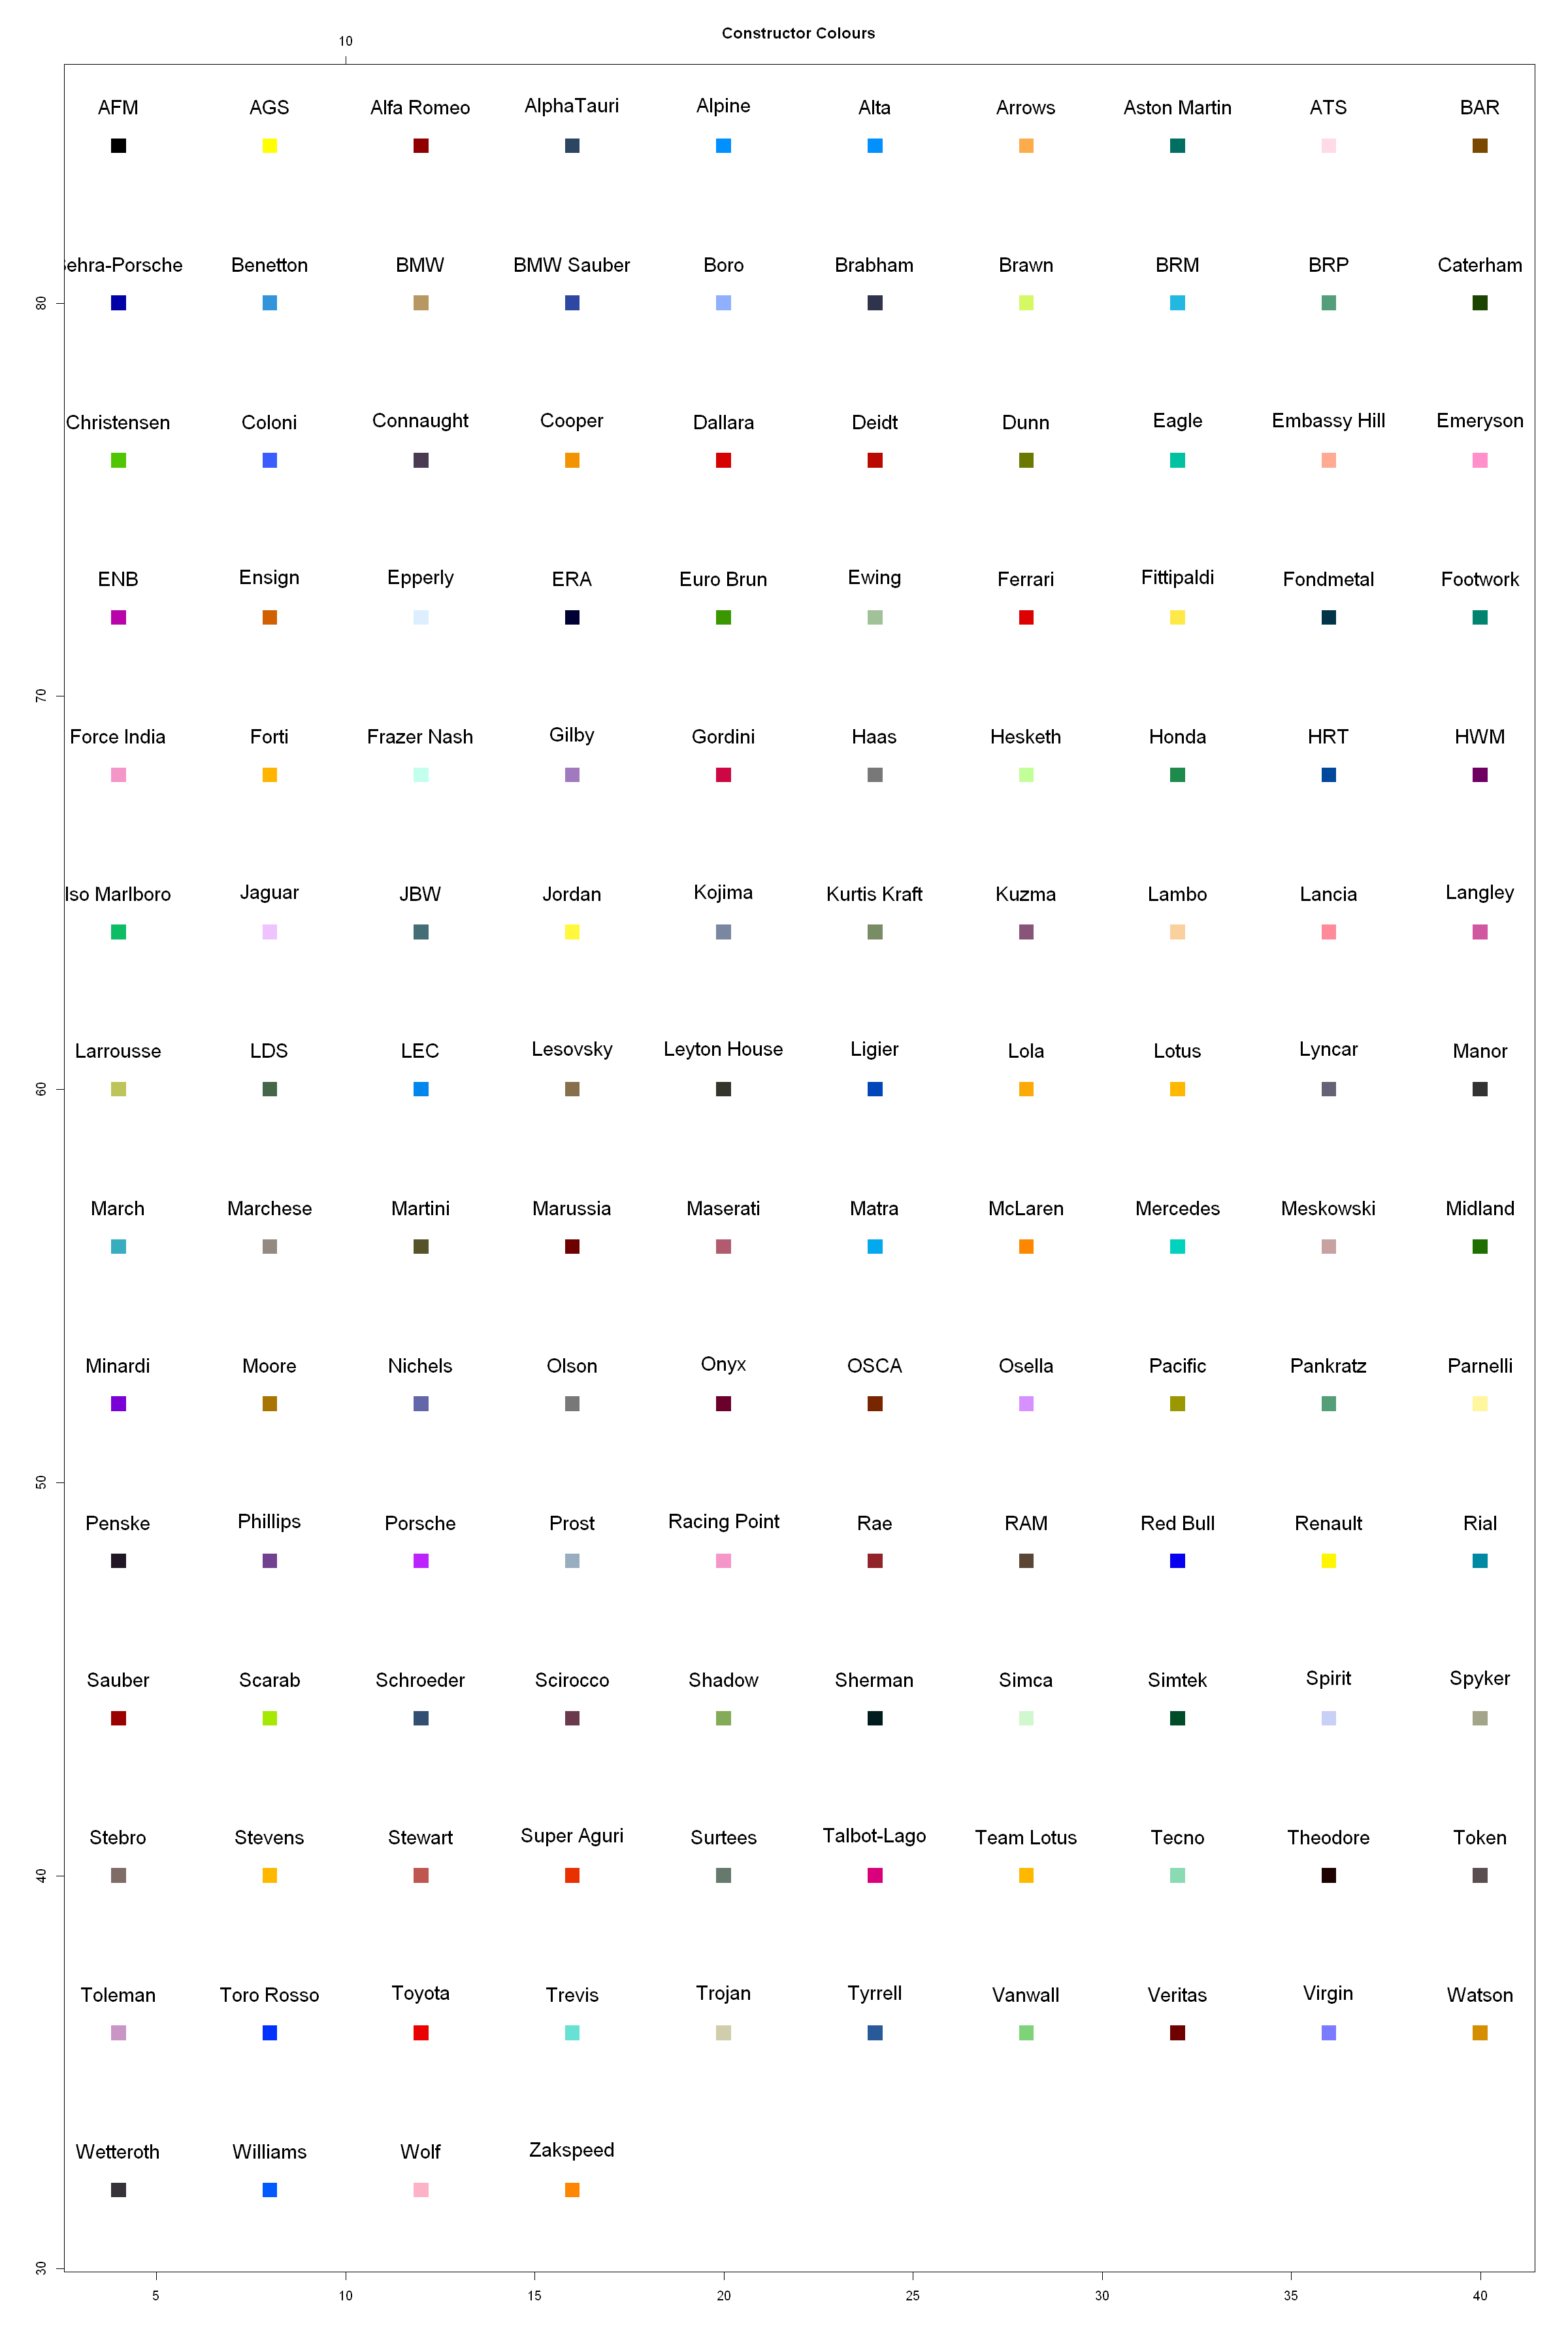

In [3]:
# Create a vector of unique constructor names
const_names <- sort(unique(df_F1$constName))

# Create a vector of colours in a visual matrix (to more easily assign a colour to the relevant constructor)
const_colours <- c("#000000", "#FFFF00", "#900000", "#2B4562", "#0090FF", "#0090FF", "#FCAC4B", "#006F62", "#FFDBE5", "#7A4900",
                   "#0000A6", "#3294DB", "#B79762", "#2E47A3", "#8FB0FF", "#2F334C", "#D6F865", "#23B8E2", "#549E79", "#1B4400", 
                   "#4FC601", "#3B5DFF", "#4A3B53", "#F39301", "#D60101", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9",
                   "#B903AA", "#D16100", "#DDEFFF", "#000035", "#3B9700", "#A1C299", "#DC0000", "#FFE948", "#013349", "#00846F",
                   "#F596C8", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#787878", "#C2FF99", "#1E8A4C", "#00489C", "#6F0062", 
                   "#0CBD66", "#EEC3FF", "#456D75", "#FFF83D", "#7A87A1", "#788D66", "#885578", "#FAD09F", "#FF8A9A", "#D157A0",
                   "#BEC459", "#456648", "#0086ED", "#886F4C", "#34362D", "#0145BA", "#FCAA08", "#FFB800", "#636375", "#323232",
                   "#38ADBF", "#938A81", "#575329", "#6E0000", "#B05B6F", "#02A9EF", "#FF8700", "#00D2BE", "#C8A1A1", "#1E6E00",
                   "#7900D7", "#A77500", "#6367A9", "#787878", "#6B002C", "#772600", "#D790FF", "#9B9700", "#549E79", "#FFF69F",
                   "#201625", "#72418F", "#BC23FF", "#99ADC0", "#F596C8", "#922329", "#5B4534", "#0600EF", "#FFF500", "#0089A3", 
                   "#9B0000", "#A4E804", "#324E72", "#6A3A4C", "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489",
                   "#806C66", "#FFB800", "#BF5650", "#E83000", "#66796D", "#DA007C", "#FFB800", "#8ADBB4", "#1E0200", "#5B4E51",
                   "#C895C5", "#0032FF", "#EA0101", "#66E1D3", "#CFCDAC", "#285A99", "#7ED379", "#6E0000", "#7A7BFF", "#D68E01",
                   "#353339", "#005AFF", "#FEB2C6", "#FF8700")

# Combine colours into a dataframe
df_const_colours <-data.frame(name = const_names,
                              colour = const_colours)

# Create x and y coordinates 
x_coord <- c()
y_coord <- c()

# Variables for position
count = 1
x_co = 4
y_co = 84

# Loop through dataframe and create coordinates
for (i in 1:nrow(df_const_colours)) {
    x_coord <- append(x_coord, x_co)
    y_coord <- append(y_coord, y_co)
    if (count%%10 == 0) {
        x_co = 4
        y_co = y_co - 4
    } else {
        x_co = x_co + 4
    }
    count = count + 1
}
df_const_colours$x <- x_coord
df_const_colours$y <- y_coord

# Plot scatter plot to visual inspect the selected colours for each constructor
options(repr.plot.width=20, repr.plot.height=30)
plot(df_const_colours$x, df_const_colours$y, pch=15, col = df_const_colours$colour, cex=2.5, xlab='',ylab='', main = 'Constructor Colours')
text(df_const_colours$x, df_const_colours$y+1, labels=df_const_colours$name, cex= 1.5)
axis(3, at=10)

# Create vector of constructor colours and attach it to the dataframe
cols <- c()
for (i in 1:nrow(df_F1)) {
    const <- df_F1[i,'constName']
    const_col <- df_const_colours[df_const_colours$name == const,'colour']
    cols <- append(cols, const_col)
}
df_F1$colour <- cols

## 4. Pre-Process The Data

Create two new databases:

- constHistory: Explores the constructor history by the year, driver, and constructor.
- driverHistory: Explores the performance of drivers on a race by race basis.

### 4.1. Constructor Database

In [4]:
# Group by year, constructor, and driver
constHistory <- df_F1 %>% group_by(year, constName, driverName) %>%
arrange(
    year, driverName
) %>%
mutate( # Create new features through mutations
    races = 1,
    wins = ifelse(finalPosition == 1, 1, 0),,
    pointPos = ifelse(finalPosition >1 & finalPosition <=10, 1, 0),
) %>%
dplyr::select( # Select desired features
    year, driverName, driverNationality, constName, constNationality, wins, standPoints, pointPos, races, colour
)

# Save Database
write.csv(constHistory,"constHistory.csv")

### 4.2. Driver Database

In [5]:
# Extract desired Information
driverHistory <- df_F1 %>% group_by(driverName) %>%
arrange( # arrange by date of race
    raceDate,
) %>%
mutate( # Create new features through mutations
    raceCount= row_number(),
    wins = ifelse(finalPosition==1,1,0),
    q.wins = ifelse(gridPosition==1,1,0),
    pod.wins = ifelse(finalPosition<=3,1,0),
    winCount = cumsum(wins),
    qWinCount = cumsum(q.wins),
    podCount = cumsum(pod.wins),
    totalPoints = cumsum(standPoints),
    colour = colour
) %>%
dplyr::select( # Select desired features
    raceDate, driverName, constName, raceCount, winCount, qWinCount, totalPoints, podCount, colour
)


# Save Database 
write.csv(driverHistory,"driverHistory.csv")

## 5. References

- F1 Fansite. 2021. *F1 Teams since 1950*. Available at: https://www.f1-fansite.com/f1-teams/ [ Accessed 02 August 2021].
- Kaggle. 2021.  *Formula 1 World Championship (1950-2021)*. Available at: https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020 [Accessed 16 May 2021].
- List of Formula One Constructors. 2021. *Wikipedia The Free Encyclopedia*. Available at: https://en.wikipedia.org/wiki/List_of_Formula_One_constructors [ Accessed 02 August 2021].
- Points. 2021. *The Formula 1 Wiki*. Available at: https://f1.fandom.com/wiki/Points [ Accessed 02 May 2021].